In [1]:
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: 

In [2]:
import pandas as pd
df = pd.read_csv('owid-covid-data.csv')
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'owid-covid-data.csv'

In [4]:
import pandas as pd
df = pd.read_csv('owid-covid-data (1).csv')
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [5]:
# Keep only useful columns
df = df[['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 'population', 'continent']]

# Drop rows with missing total_cases or total_deaths
df.dropna(subset=['total_cases', 'total_deaths'], inplace=True)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# View cleaned data
df.head()


/tmp/ipython-input-5-1646218021.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['total_cases', 'total_deaths'], inplace=True)
/tmp/ipython-input-5-1646218021.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


,date,location,total_cases,new_cases,total_deaths,population,continent
0,2020-01-05,Afghanistan,0.0,0.0,0.0,41128772,Asia
1,2020-01-06,Afghanistan,0.0,0.0,0.0,41128772,Asia
2,2020-01-07,Afghanistan,0.0,0.0,0.0,41128772,Asia
3,2020-01-08,Afghanistan,0.0,0.0,0.0,41128772,Asia
4,2020-01-09,Afghanistan,0.0,0.0,0.0,41128772,Asia


/tmp/ipython-input-6-66587673.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette='flare')


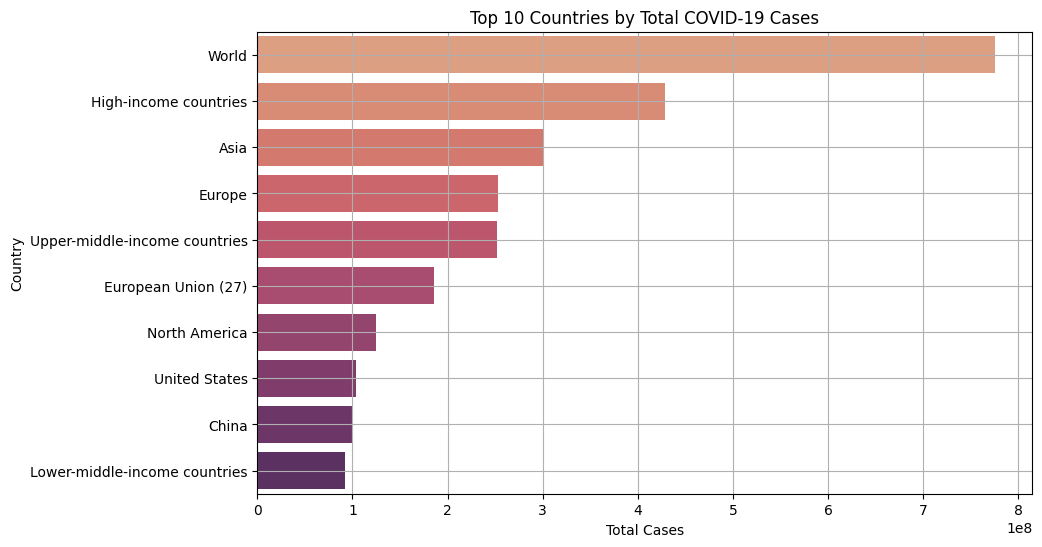

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get max total cases per country
top_10 = df.groupby("location")["total_cases"].max().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_10.values, y=top_10.index, palette='flare')
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.grid(True)
plt.show()


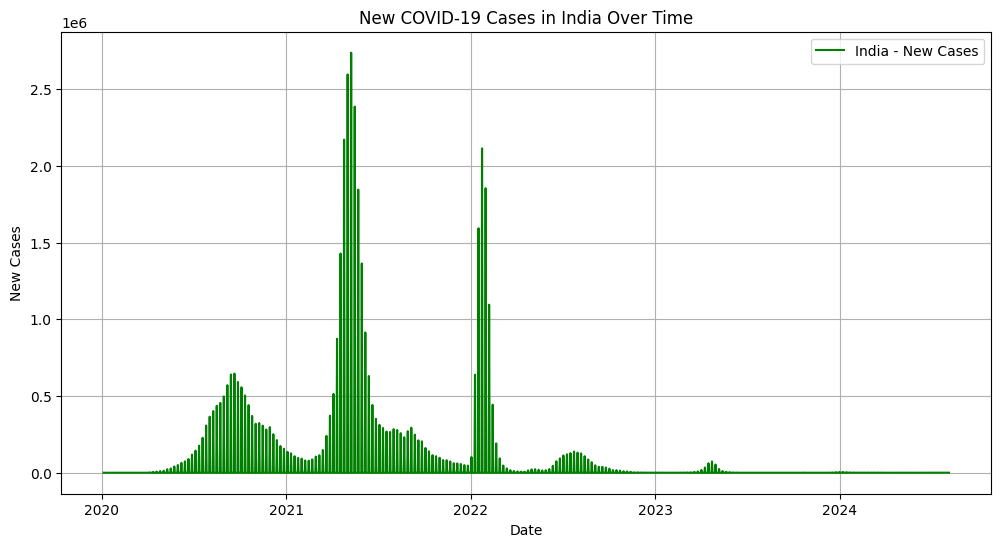

In [7]:
# Filter India data
india = df[df['location'] == 'India']

# Plot
plt.figure(figsize=(12,6))
plt.plot(india['date'], india['new_cases'], color='green', label='India - New Cases')
plt.title('New COVID-19 Cases in India Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.show()


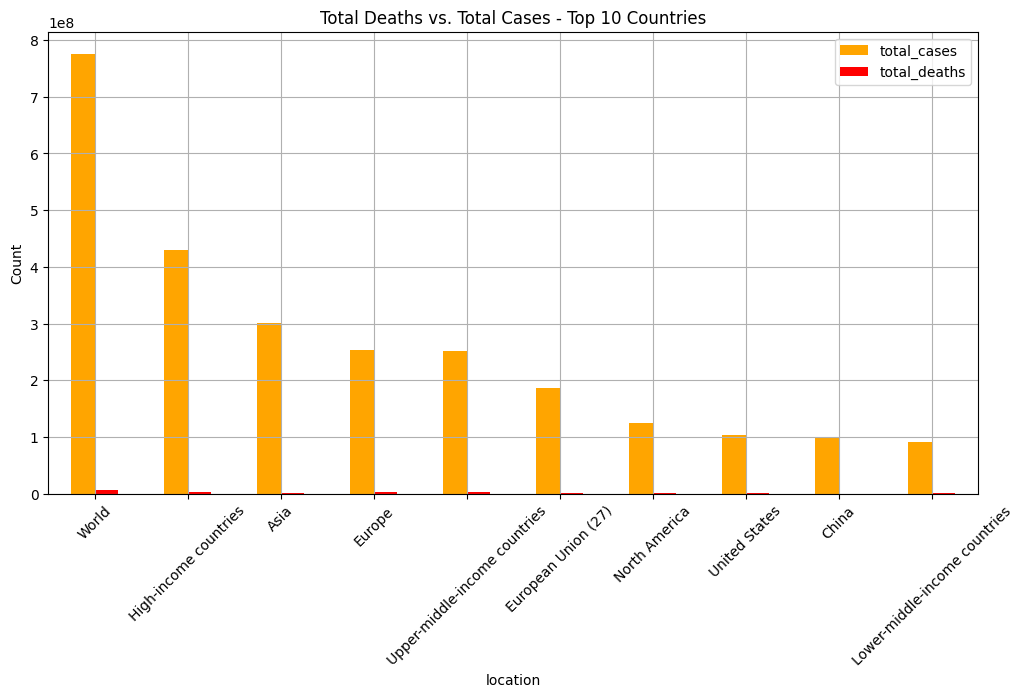

In [8]:
# Get top 10 countries again
top_10_countries = df.groupby('location')[['total_cases', 'total_deaths']].max().sort_values(by='total_cases', ascending=False).head(10)

# Plot
top_10_countries.plot(kind='bar', figsize=(12,6), color=['orange', 'red'])
plt.title("Total Deaths vs. Total Cases - Top 10 Countries")
plt.ylabel("Count")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


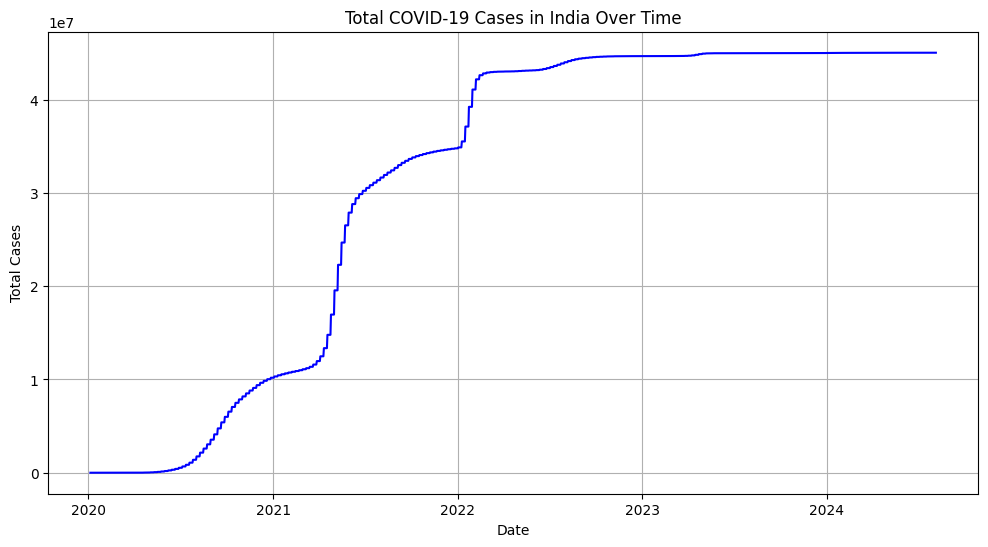

In [9]:
# Plot line graph of total cases
plt.figure(figsize=(12,6))
plt.plot(india['date'], india['total_cases'], color='blue')
plt.title("Total COVID-19 Cases in India Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.grid(True)
plt.show()


/tmp/ipython-input-10-1826209858.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=death_rate_top10.values, y=death_rate_top10.index, palette='Reds_r')


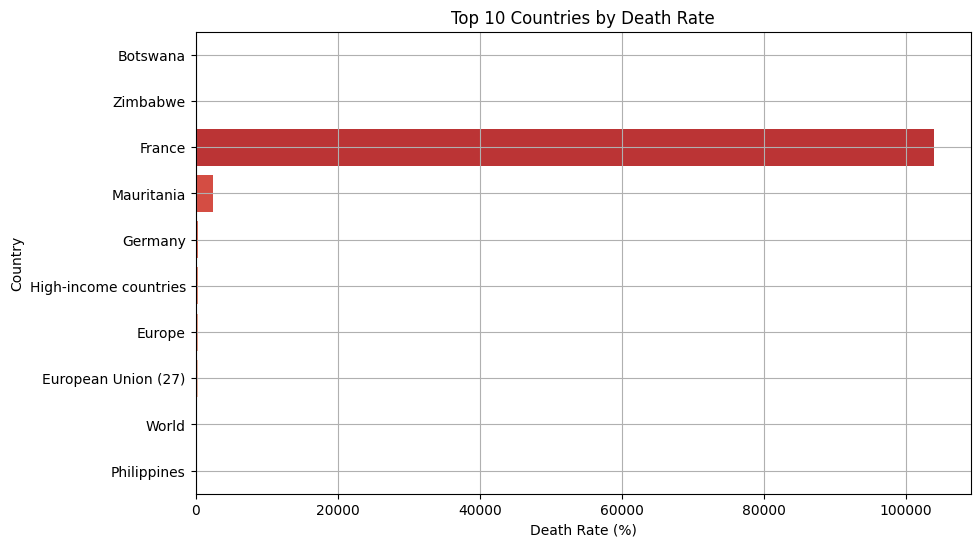

In [10]:
# Add death rate column
df['death_rate'] = (df['total_deaths'] / df['total_cases']) * 100

# Top 10 countries by death rate
death_rate_top10 = df.groupby('location')['death_rate'].max().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=death_rate_top10.values, y=death_rate_top10.index, palette='Reds_r')
plt.title("Top 10 Countries by Death Rate")
plt.xlabel("Death Rate (%)")
plt.ylabel("Country")
plt.grid(True)
plt.show()
